In [ ]:
! pip install mecab-python3 unidic
! python -m unidic download


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 11.1 MB/s eta 0:00:00
  Created wheel for unidic: filename=unidic-1.1.0-py3-none-any.whl size=7403 sha256=1404bd79f2855096970dac49d465a9cd2e2c66714bde6a93eceffdefb6cce7f7
  Stored in directory: /root/.cache/pip/wheels/7a/72/72/1f3d654c345ea69d5d51b531c90daf7ba14cc555eaf2c64ab0
Successfully built unidic
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstalling wasabi-1.1.3:
      Successfully uninstalled wasabi-1.1.3
download url: https://cotonoha-dic.s3-ap-northeast-1.amazonaws.com/unidic-3.1.0.zip
Dictionary version: 3.1.0+2021-08-31
unidic-3.1.0.zip: 100% 526M/526M [00:29<00:00, 17.7MB/s]
Finished download.
Downloaded UniDic v3.1.0+2021-08-31 to /usr/local/lib/python3.10/dist-packages/unidic/dicdir


In [ ]:
#形態素解析
import MeCab
import unidic
mecab = MeCab.Tagger()
FILE_NAME = "neko.txt"

with open(FILE_NAME, "r", encoding="utf-8") as f,open("neko.txt.mecab", "w") as f2:
    content = f.readlines()
    for text in content:
        result = mecab.parse(text)
        f2.write(result)


In [ ]:
#30
with open("neko.txt.mecab", "r", encoding="utf-8") as f:
    content = f.readlines()
    neko_list = []
    general_list=[]
    for text in content:
        neko={}

        text_1 = text.split("\t")
        if text_1[0] == "EOS\n":
          continue
        text_2 = text_1[1].split(",")
        neko["surface"] = text_1[0]
        if len(text_2) <= 7:
           neko["base"] = text_1[0]
        else:
           neko["base"] = text_2[7]
        neko["pos"] = text_2[0]
        neko["pos1"] = text_2[1]
        neko_list.append(neko)
        if text_1[0]=="。":
            general_list.append(neko_list)
            neko_list = []

print(general_list)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#31
verb_list=[]
for sentence in general_list:
  for text in sentence:
    if text["pos"] == "動詞":
      verb_list.append(text["surface"])

verb = set(verb_list)
print(verb)

{'噛み切ろう', '優っ', '潜ら', 'かたちづくっ', '繋が', '瞬く', '謹ん', '立ちすくん', '果さ', '企だて', '切り付ける', '持ち出し', '返えし', '仰ぎ', '知れ', '伺えれ', '突い', '投げ込ん', '捲い', '召し上ら', '残る', '呼ん', 'あつまっ', '起ら', '賞める', 'やみ', '捕れる', '休ま', '読みとばす', 'かえ', '起き上り', '倚っ', '作り上げ', '騒ぎ立て', '布か', '化ける', '合う', '撲つ', 'くるみ込む', '儲かっ', 'さめ', '死に', '踏み出せ', '弾こう', 'かじっ', '見届け', '付い', '洩らさ', '騒い', '済ん', '引き返す', '終り', 'すん', '召し上がれ', 'かなう', '頼み', '吐き出す', 'あてがえ', '使っ', '似合う', 'ぬける', '乗ん', '辱', 'とまる', '問う', '片付く', '仕立てる', 'ころがる', '擦っ', '抜け出し', '膨らまし', '欺す', '限っ', '羨む', '噛む', 'じれ', '飛び込ん', 'なめる', '聞い', '見廻す', 'よそい', '聞える', '欠け', 'おろし', 'かむ', 'すい', '侵し', '連れ出さ', '撃ちとっ', '詠ん', '逢っ', '討とう', '頼ん', '抑える', '去ら', '帰り', 'しまおう', '結っ', '優る', 'け出し', '纏まる', '出し', '振り', '誇る', '上がん', 'どけ', '減ら', '押し出し', 'もらっ', '返さ', '食み出し', '吐く', '並外れ', '廃し', 'うく', 'のしゃ', '振う', '仕', 'ころがり', 'きか', '給え', '知ろう', '異っ', '磨り', '磨りあげ', '退い', '悟り', 'ぜら', '乞わ', '飛び上っ', '降ら', '縊る', '滅すれ', '清め', '欲し', '続か', '遮っ', '飛び越える', 'とろけ', '上がり', '渡っ', '食い込ん', '刻み', '込ん', '立っ', '喰う', '思い留まり', '暴く', '巻

In [ ]:
#32
base_list=[]
for sentence in general_list:
  for text in sentence:
    if text["pos"] == "動詞":
      base_list.append(text["base"])

verb = set(base_list)
print(verb)

{'憂う', '呈する', '瞬く', '呼び掛ける', '切り付ける', '浮かす', '明け放つ', '言い合う', '残る', '説き出す', '縛り付ける', '枯らす', '遮る', '謁する', '震える', '申し合わせる', '居た堪れる', '合う', '化ける', '跳ね返す', '堪る', '取り除ける', '似る', '御座る', '引き返す', '吐き出す', '似合う', '問う', '片付く', '打ち崩す', '放り込む', '摩る', '仕立てる', '撓める', '占める', '使い分ける', '噛む', '取り乱す', '浸る', '羨む', '見積もる', '膨れ返る', '古ぼける', '為る', '纏まる', '誇る', '選る', '振り掛ける', '忌み嫌う', '吐く', '噎せる', '於く', '引き据える', '割れる', '見送る', '縊る', '交じる', '飛び越える', '食い切る', '暴く', '並外れる', '震わせる', '競う', '擦り付ける', '出会わす', '認める', '持ち上げる', '移す', '取り払う', '司る', '釣り込む', '途切らす', '経つ', '取り巻く', '研ぎ澄ます', '会わす', '切り刻む', '見計らう', '覆す', '涼む', '言い放つ', '促す', '詰る', '寄り添う', '漲る', '叶う', '魘される', '免れる', '飛び離れる', '殴り付ける', '定める', '至らす', '叶える', '偽る', '踏み込む', '買い被る', '引き取る', '表わす', '聞き質す', '弾ける', '睨める', '輝く', '接する', '放つ', '決する', '利かす', '差し支える', '坐す', '剥がれる', '引き摺る', '借りる', '奪う', '着く', '退ける', '浴びせ掛ける', '切り破る', '掴む', '見せる', '見縊る', '挑む', '埋め合わす', '出歩く', '覚える', '火照る', '抗する', '出直す', '形作る', '狼狽える', '評する', '果たす', '締め殺す', 'ひっぺがす', '死する', '振り翳す', 'からかう', '立ち行く', '慕う',

In [ ]:
#33
no_list =[]
for sentence in general_list:
  for i in range(len(sentence)):
    if sentence[i]["surface"] =="の" and sentence[i-1]["pos"] =="名詞" and sentence[i+1]["pos"] == "名詞":
      no_list.append(sentence[i-1]["surface"] + sentence[i]["surface"] + sentence[i+1]["surface"])

print(no_list)

['掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '藁の上', '笹原の中', '池の前', '一樹の蔭', '垣根の穴', '隣家の三毛', '時の通路', '一刻の猶予', '家の内', '以外の人間', '前の書生', '胸の痞', '家の主人', '主人の方', 'なしの小猫', '鼻の下', '自分の住家', '家のもの', 'うちのもの', '本の上', '皮膚の色', '本の上', '以外のもの', '主人の傍', '膝の上', '経験の上', '飯櫃の上', '炬燵の上', 'うちの小供', '小供の寝床', '小供の一人', '例の神経', '次の部屋', '自分の勝手', 'へっついの中', '台所の板の間', '家の書生', '裏の池', '親子の愛', '隣りの三毛', '目刺の頭', '鰡の臍', '軍人の家', '代言の主人', '教師の家', '猫の時節', '家の主人', '胃弱の癖', '後架の中', '平の宗盛', '月の月給', '主人の述懐', '金縁の眼鏡', '主人の顔', '室内の想像', '訳のもの', '利の大家', '金縁の裏', '顔のあたり', '上乗の出来', '顔の造作', '他の猫', '斑入りの皮膚', '主人の彩色', '一種の色', '身内の筋肉', '主人の予定', '座敷の中', '人の気', '自己の力量', '人間の不徳', '家の裏', 'うちの小供', '日の二', 'たこの茶園', '茶の木', '木の根', '西側の杉垣', '杉垣のそば', '他の庭内', '皮膚の上', '柔毛の間', '嘆賞の念', '好奇の心', '小春の風', '杉垣の上', '梧桐の枝', '枯菊の茂み', '真丸の眼', '人間の珍重', '双眸の奥', '額の上', '声の底', '教師の家', '良家の猫', '車屋の黒', '車屋の黒', '主義の的', '軽侮の念', '左の問答', '車屋の方', 'うちの主人', '車屋の猫', '教師の方', '腹の足し', '車屋の黒', '相当の気焔', '茶畠の中', '黒の比較', '鼻の先', '自分の手柄', '墻壁の欠', '鼠の百', '掃除の時', 'うちの亭主', '石灰の袋',

In [ ]:
#34
noun_list =[]
for sentence in general_list:
    count = 0
    sent = ""
    for i in range(len(sentence)):
        if sentence[i]["pos"] == "名詞":
            count += 1
            sent += sentence[i]["surface"]
        else:
            if count >= 2:
              noun_list.append(sent)
            count = 0
            sent = ""
noun_set = set(noun_list)
noun_set

{'半分降参',
 '銀煙管',
 '二口三口',
 '限り積極',
 '俳体詩',
 '近頃東京',
 '五六円',
 '日雇婆',
 '猫なで声',
 '俳句会',
 '十年間',
 '文芸倶楽部',
 '見受け候えど',
 '十株',
 '東京通',
 '寸方',
 '道徳経',
 '横行濶歩',
 '倍以上',
 '俳句趣味',
 '日例',
 'みんな営養不足',
 '大根卸',
 '後時々東京',
 '一ヵ年',
 '最前書斎',
 '三間半',
 'すべて独仙',
 '文明中学',
 '金子善兵衛方',
 '袴期',
 '二八',
 '代り向後',
 'よしよし坊',
 '道中双六',
 '冥頑',
 '次第次第',
 '朗読会',
 '今途中',
 '出ずる',
 '大概逆上',
 '泥棒陰',
 '晩帰り',
 '鉢合',
 '九十度',
 '三方面',
 '四望人',
 '東郷閣下',
 '征露',
 '黒足袋',
 '昨日紹介',
 'みんな同',
 '今日何',
 '電光影裏',
 '何年前',
 '時寝返り',
 'き細君',
 'Ｃ先生',
 'みんな逆',
 'みんな魂胆',
 '禿岩',
 '軽便信用',
 '八九間',
 '千円',
 '一番',
 '癲癇病み',
 '野呂間',
 '先刻雑巾',
 '二絃琴',
 '寡人政治',
 '模様画',
 '毎晩竹刀',
 'ヴァイオリン癲癇',
 '人指しゆび',
 '一たび服装',
 '不便邪魔',
 '郎君独寂寞',
 '主人苦沙弥',
 '夕べ何時',
 '九年前',
 '岩見重太郎',
 '和尚両肌',
 '一人同窓',
 '二三尺',
 '青年男女',
 '後鼻',
 '昔静岡',
 '道一',
 '金魚麩',
 '五杯',
 '八方睨み',
 '一幕物',
 'くりゃるな八幡鐘',
 '根気負け',
 '穴守稲荷',
 '三四分',
 '候節',
 '金唐皮',
 '羽織期',
 '半分妻君',
 '日自分',
 '神田辺',
 'いくら迷亭',
 '時々旧先生',
 '田舎もの',
 '眼鏡越',
 '人さし指',
 '迷亭自身',
 '折々人',
 '退校どころ',
 '主人自ら',
 '演者自身',
 '羽織全盛',
 '人間以外',
 '五六行',
 '短日月',
 

In [ ]:
#35
import collections

word_list =[]
for sentence in general_list:
  for i in range(len(sentence)):
    if sentence[i]["pos"] != "補助記号" and sentence[i]["pos"] != "助詞" and sentence[i]["pos"] != "助動詞":
      word_list.append(sentence[i]["surface"])

word_count = collections.Counter(word_list)
most_word=word_count.most_common()
most_word


[('し', 2471),
 ('ある', 1726),
 ('ない', 1314),
 ('いる', 1255),
 ('事', 1212),
 ('する', 1055),
 ('もの', 973),
 ('君', 971),
 ('云う', 937),
 ('主人', 934),
 ('何', 715),
 ('御', 707),
 ('よう', 683),
 ('この', 655),
 ('その', 620),
 ('それ', 612),
 ('そう', 570),
 ('一', 490),
 ('人', 486),
 ('吾輩', 481),
 ('これ', 472),
 ('どう', 413),
 ('\u3000', 411),
 ('なっ', 408),
 ('さん', 401),
 ('なる', 395),
 ('い', 383),
 ('来', 383),
 ('ところ', 383),
 ('見', 366),
 ('時', 351),
 ('迷亭', 343),
 ('方', 321),
 ('いい', 319),
 ('上', 298),
 ('寒月', 286),
 ('人間', 279),
 ('顔', 277),
 ('先生', 274),
 ('見る', 273),
 ('僕', 270),
 ('そんな', 259),
 ('また', 256),
 ('中', 254),
 ('あり', 247),
 ('云っ', 241),
 ('猫', 238),
 ('三', 238),
 ('気', 233),
 ('思っ', 232),
 ('出来', 232),
 ('出', 231),
 ('あっ', 221),
 ('今', 221),
 ('二', 217),
 ('細君', 212),
 ('彼', 206),
 ('なく', 203),
 ('間', 201),
 ('少し', 197),
 ('者', 197),
 ('しかし', 190),
 ('あの', 189),
 ('なら', 179),
 ('自分', 175),
 ('ちょっと', 171),
 ('頭', 167),
 ('訳', 159),
 ('ただ', 156),
 ('前', 156),
 ('声', 156),
 ('いう', 155),
 ('うち'

In [ ]:
pip install japanize-matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 37.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=90a5c4b65f6959f08f8e585175c78937ba0d6ba53844b39e8430b2de151de019
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


<BarContainer object of 10 artists>

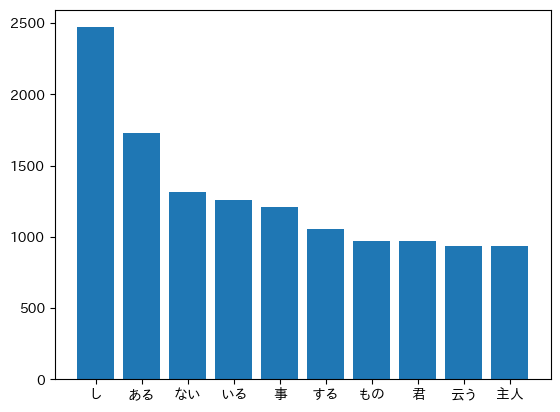

In [ ]:
#36
import japanize_matplotlib
import matplotlib.pyplot as plt



word_list = []
height_list = []
for i in range(10):
    word_list.append(most_word[:10][i][0])
    height_list.append(most_word[:10][i][1])
plt.bar(x = word_list ,height = height_list)




<BarContainer object of 10 artists>

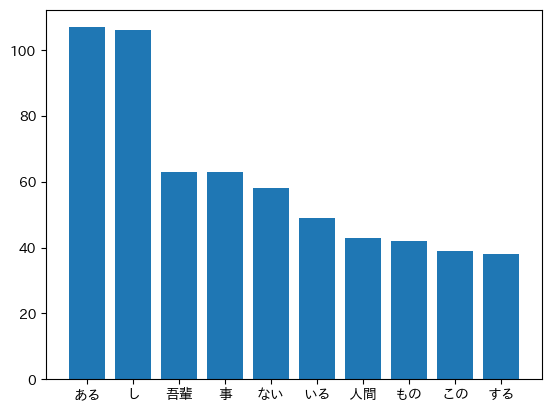

In [ ]:
#37
import itertools
import matplotlib
matplotlib.get_cachedir()
import matplotlib.pyplot as plt
import japanize_matplotlib

#猫が含まれる分の単語リストを作成
neko_list = []
for sentense in general_list:
    text37 = []
    Flag = 0
    for text in sentense:
        if "猫" in text["surface"]:
            Flag = 1
            continue
        if text["pos"] != "補助記号" and text["pos"] != "助詞" and text["pos"] != "助動詞":
            text37.append(text["surface"])
    if Flag == 1:
        neko_list.append(text37)


#頻出後のカウント
all_neko = itertools.chain.from_iterable(neko_list)
c = collections.Counter(all_neko)


word_list = []
height_list = []
for i in range(10):
    word_list.append(c.most_common()[:10][i][0])
    height_list.append(c.most_common()[:10][i][1])
plt.bar(x = word_list, height = height_list)


(array([6608., 2272., 1126.,  663.,  513.,  325.,  285.,  210.,  140.,
         119.,  108.,  103.,  101.,   91.,   63.,   68.,   59.,   63.,
          37.,   44.,   31.,   30.,   30.,   35.,   34.,   25.,   22.,
          43.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29.]),
 <BarContainer object of 28 artists>)

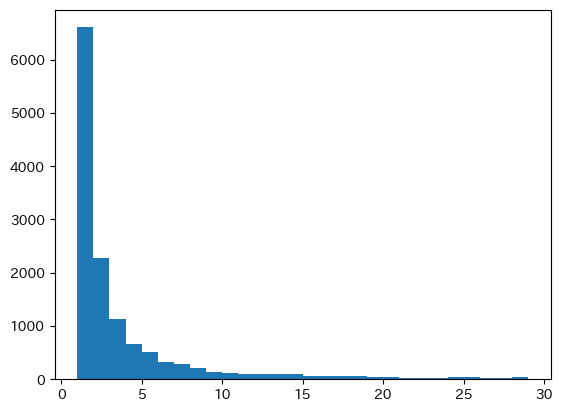

In [ ]:
#38
import matplotlib
matplotlib.get_cachedir()
import matplotlib.pyplot as plt
word_list = []
for sentense in general_list:
    for text in sentense:
        word_list.append(text["surface"])
data38 = collections.Counter(word_list)
plt.hist(data38.values(), range(1, 30)) #30はグラフへの描画数


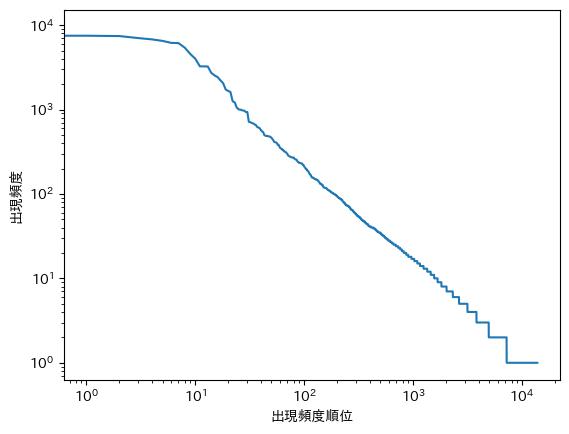

In [ ]:
#39
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
word_list = []
for sentense in general_list:
    for text in sentense:
        word_list.append(text["surface"])
data39 = collections.Counter(word_list)
temp2 = sorted((data39.values()), reverse = True)
plt.plot(temp2)
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()
